In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [2]:
train=pd.read_csv('bigmart train.csv')
train=pd.DataFrame(train)

In [3]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
test=pd.read_csv('bigmart test.csv')
test=pd.DataFrame(test)

In [5]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [6]:
train.shape

(8523, 12)

In [7]:
test.shape

(5681, 11)

From above we understand that there are some missing data in test files.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


From above data we conclude that in train and test we have string as well as integer data present hrnce we wil have to use the encoding process further.

In [10]:
train.columns, test.columns

(Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type'],
       dtype='object'))

we have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns.

In [11]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
test.isnull().sum()/test.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

We have some percentage of test data missing in test columns, 17.18% (or 976) in Item weight and 28.26% (or 1606) in outlet size are missing.

In [13]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
train.isnull().sum()/train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

We have some percentage of train data missing in test columns, 17.16% (or 1463) in Item weight and 28.27% (or 2410)in outlet sizeare missing.

In [15]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [17]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(1463, 976)

Item_Weight                     AxesSubplot(0.125,0.125;0.110714x0.755)
Item_Visibility              AxesSubplot(0.257857,0.125;0.110714x0.755)
Item_MRP                     AxesSubplot(0.390714,0.125;0.110714x0.755)
Outlet_Establishment_Year    AxesSubplot(0.523571,0.125;0.110714x0.755)
dtype: object

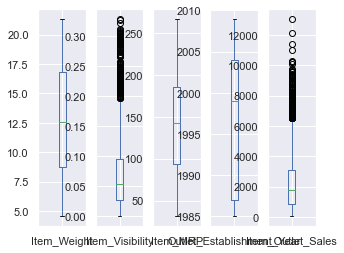

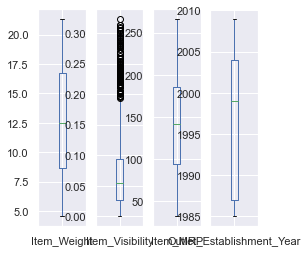

In [18]:
train.plot(kind='box',subplots=True, layout=(1,6))
test.plot(kind='box',subplots=True, layout=(1,6))

We will have to work on missing data, for this we will have to check if we have any outliers present in the Item weight columns in both train and test data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

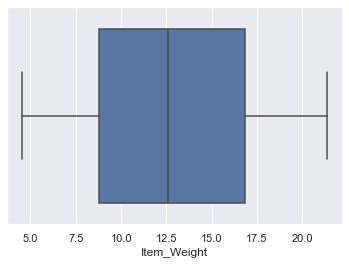

In [19]:
sns.boxplot('Item_Weight',data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

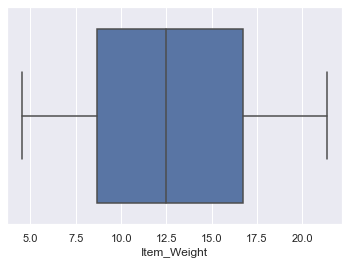

In [20]:
sns.boxplot('Item_Weight',data=test)

From above box plot we could see that there are no outliers present in Item wight hence the missing value can be replaced by Mean values.
But item visibility have significatant outliers in train data as well as test data, while outlet sales have outliers in train data only

In [21]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [22]:
train.isnull().sum(),test.isnull().sum()

(Item_Identifier                 0
 Item_Weight                     0
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  2410
 Outlet_Location_Type            0
 Outlet_Type                     0
 Item_Outlet_Sales               0
 dtype: int64,
 Item_Identifier                 0
 Item_Weight                     0
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  1606
 Outlet_Location_Type            0
 Outlet_Type                     0
 dtype: int64)

Here we could see that missing values of Item_e=weight is now replaced, similarly we will have to work on replacing the values of Outlet_size.
But oOutlet_size is a categorical data  hence we will replace them with Mode values and not by Mean values

In [23]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [24]:
test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [25]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])
                                            

In [26]:
train.isnull().sum(),test.isnull().sum()

(Item_Identifier              0
 Item_Weight                  0
 Item_Fat_Content             0
 Item_Visibility              0
 Item_Type                    0
 Item_MRP                     0
 Outlet_Identifier            0
 Outlet_Establishment_Year    0
 Outlet_Size                  0
 Outlet_Location_Type         0
 Outlet_Type                  0
 Item_Outlet_Sales            0
 dtype: int64,
 Item_Identifier              0
 Item_Weight                  0
 Item_Fat_Content             0
 Item_Visibility              0
 Item_Type                    0
 Item_MRP                     0
 Outlet_Identifier            0
 Outlet_Establishment_Year    0
 Outlet_Size                  0
 Outlet_Location_Type         0
 Outlet_Type                  0
 dtype: int64)

Now we have the no missing data in train and test files.

EDA on train and test data

In [27]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
train['Item_Fat_Content'].value_counts()   # here the data of fat analysis can be done however the data is not categories properly Low fat or low fat or LF are one and the same similarly Reg and regular are same hence we will replace them in one sequence so that the count is properly done

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [29]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

We are making changes in train and test data as they are having certain relation ship

In [30]:
train['Item_Fat_Content'].value_counts()    # we have now properly arranged the data

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [31]:
train['Item_Type'].value_counts()      # we can check the number of items and there counts in all the outlets accroding to there classification

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [32]:
train['Outlet_Identifier'].value_counts()    # the count of outlet identifiers can be checked

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [33]:
train['Outlet_Establishment_Year'].value_counts()    # here we can see the number of outlets that were established in the corresponding years

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [34]:
train['Outlet_Size'].value_counts()      # we can see the number of Medium small or High outlets count

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [35]:
train['Outlet_Location_Type'].value_counts()    # here we can see the outlets count in Tier3, tier2 or tier1 city locations

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [36]:
train['Outlet_Type'].value_counts()        # we can see that there are various categories of outlet and there respective number count accordingly.

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Visulaization 

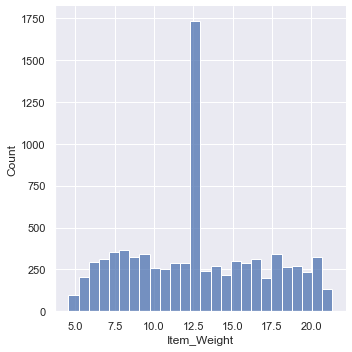

In [37]:
sns.displot(train["Item_Weight"])    

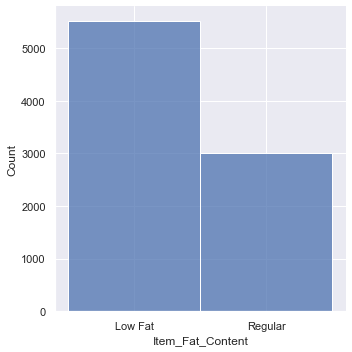

In [38]:
sns.displot(train["Item_Fat_Content"])

Low fat items are high in demand is the observation that we could see from the above represntation.

Fruits and Vegetables are sold on high demand while snacks too have good sales figure. 

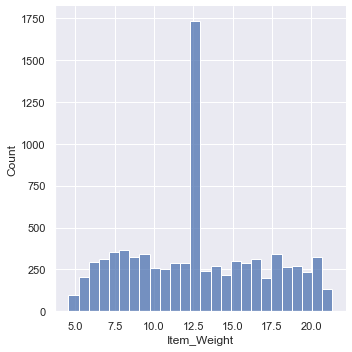

In [39]:
sns.set()
%matplotlib inline
sns.displot(train["Item_Weight"])   

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

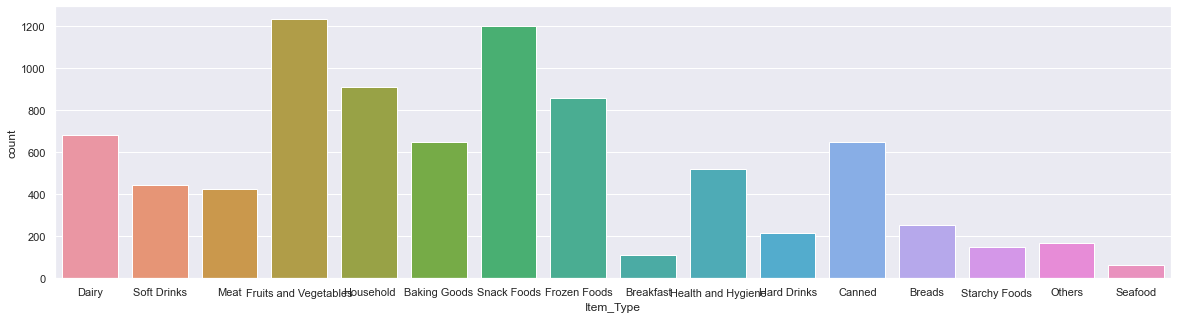

In [40]:
sns.set()
%matplotlib inline
plt.figure(figsize=(20,5))
sns.countplot('Item_Type',data=train)  

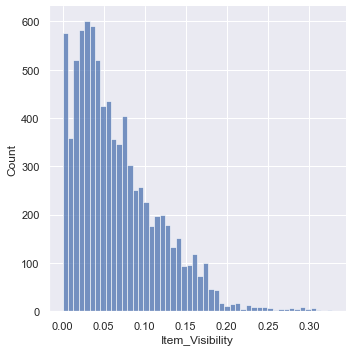

In [41]:
sns.displot(train["Item_Visibility"])   

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

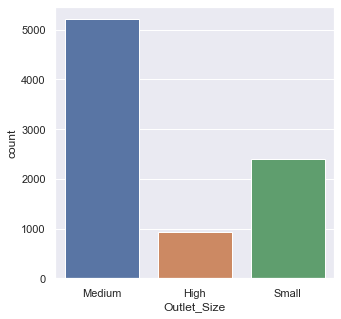

In [42]:
plt.figure(figsize=(5,5))
sns.countplot('Outlet_Size',data=train) 

From above graph we understand that the sales figure in medium size outlets are high and High outlet size have low sales figure jile the small have moderate.

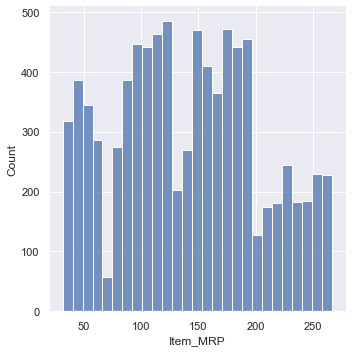

In [43]:
sns.displot(train["Item_MRP"])   

Here we could see that the MRP price of goods with 20 to 190 has maximum sales count

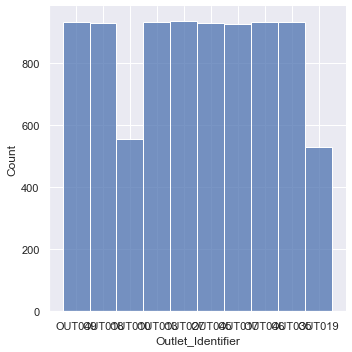

In [44]:
sns.displot(train["Outlet_Identifier"])   

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

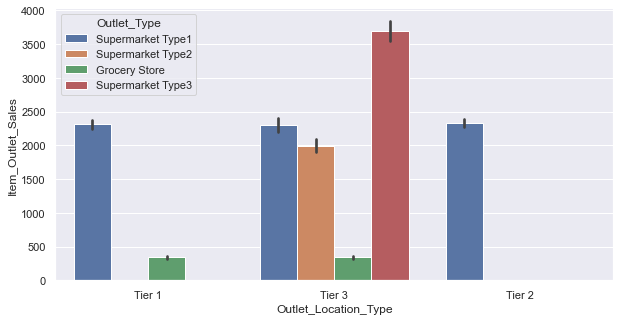

In [45]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train)

From above representation we can see that the tier1 locations have supermarkets and Grocery stores with high sales volumn
while tier3 locations have all type of outlets and high sales volumn
while tier2 locations have Supermaket type 1 with high sales volumn.

Lable encoding

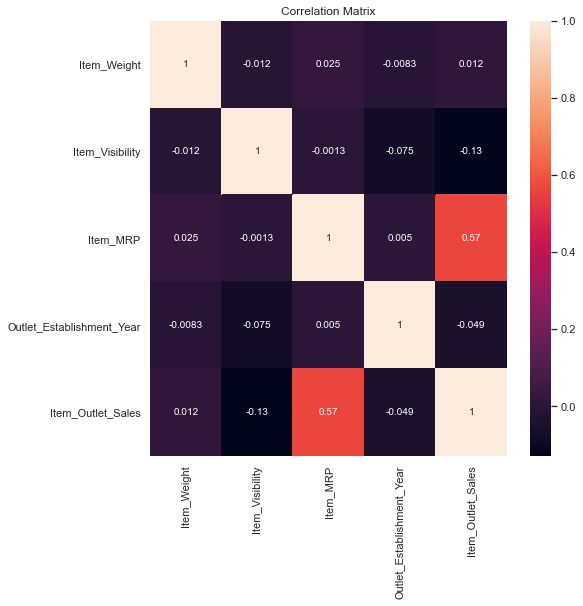

In [46]:
corr_mat=train.corr()
plt.figure(figsize=[8,8])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

Item_MRP is  correlated with Item_Outlet_Sales, Item_MRP is important.
Item_visibility has negative relationship with item outlet sales.

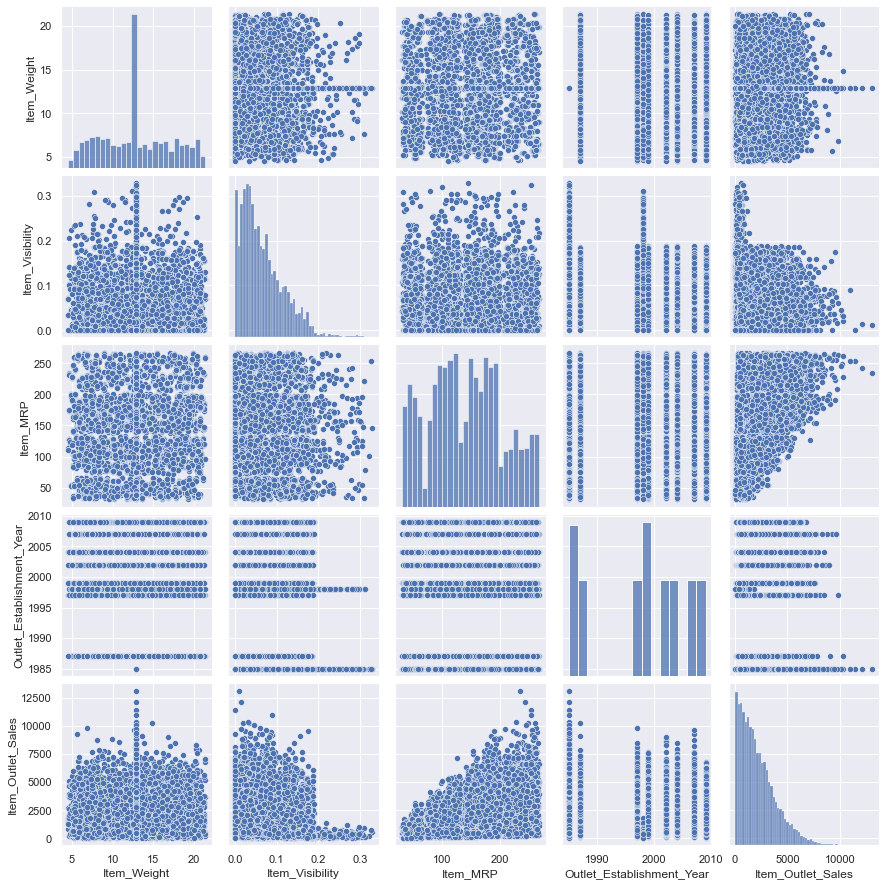

In [47]:
sns.pairplot(train)

In [48]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Here we will have to convert the string data from column 0f item_fat_content, item_type, outlet size, outlet location_type to integer values
this is done by the label encoding process.

In [49]:
# Here in train we do not need the data from Item_identifier,outlet establishment year and item Identifier hence we will drop them from both train and test.
train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [50]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976


In [51]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1
1,8.300000,Regular,0.038428,Dairy,87.3198,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,Medium,Tier 2,Supermarket Type1


In [52]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [53]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in var_mod:
    train[i] = LE.fit_transform(train[i])
    
for i in var_mod:
    test[i] = LE.fit_transform(test[i])

In [54]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,0,2,1,994.7052


In [55]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,1,0,1
1,8.300000,1,0.038428,4,87.3198,1,1,1
2,14.600000,0,0.099575,11,241.7538,1,2,0
3,7.315000,0,0.015388,13,155.0340,1,1,1
4,12.695633,1,0.118599,4,234.2300,1,2,3


The data free of strings

In [56]:
x=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [57]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,1,0,1
1,5.920,1,0.019278,14,48.2692,1,2,2
2,17.500,0,0.016760,10,141.6180,1,0,1
3,19.200,1,0.000000,6,182.0950,1,2,0
4,8.930,0,0.000000,9,53.8614,0,2,1
...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1
8519,8.380,1,0.046982,0,108.1570,1,1,1
8520,10.600,0,0.035186,8,85.1224,2,1,1
8521,7.210,1,0.145221,13,103.1332,1,2,2


In [58]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

Using above commands, we have seperated the x and y 

# Model

In [59]:
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=22)

In [60]:
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
6594,14.000000,1,0.037581,5,162.6526,1,0,1
4942,17.700000,1,0.135306,15,183.7924,1,0,1
4632,8.850000,0,0.053822,6,183.8292,0,2,1
5846,15.600000,0,0.081563,0,112.7544,1,1,1
6760,12.600000,1,0.041727,6,122.0072,1,2,2
...,...,...,...,...,...,...,...,...
2527,15.200000,1,0.173704,6,175.8054,1,2,0
4587,15.150000,0,0.027774,0,152.3708,2,1,1
6646,12.857645,1,0.073541,5,192.2820,2,0,0
5478,17.600000,0,0.041852,14,162.7526,1,1,1


In [61]:
x_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
6544,16.500000,0,0.035626,8,93.1120,0,2,1
1877,7.020000,0,0.081623,6,148.0734,1,1,1
2933,12.857645,0,0.053972,13,141.2154,1,2,3
8116,8.010000,0,0.117580,7,36.6532,1,2,0
6240,6.130000,0,0.076721,4,59.4536,2,1,1
...,...,...,...,...,...,...,...,...
3160,12.857645,0,0.020460,11,81.7618,1,2,3
1402,20.000000,0,0.081454,11,36.8190,1,0,1
1985,14.150000,0,0.035017,13,245.3828,1,2,2
3974,17.750000,1,0.156832,4,241.0538,2,0,1


We will use the linear regression model 

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
y_train

6594    4275.7676
4942    2221.1088
4632    2554.0088
5846    1118.5440
6760    1470.0864
          ...    
2527    1050.6324
4587    3159.8868
6646     386.1640
5478    3124.5994
6276    3884.9430
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [71]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [72]:
pred=lm.predict(x_test)
print('Prediction :',pred)
print('Actual value ', y_test) 

Prediction : [1273.63810219 2150.58713737 3681.25368909 ... 4332.87038501 3611.1798381
 5173.78905865]
Actual value  6544     932.1200
1877    1930.1542
2933    3119.9388
8116      71.9064
6240    2021.3688
          ...    
3160    2175.1686
1402     768.9990
1985    1705.7796
3974    1201.7690
6398    2607.2728
Name: Item_Outlet_Sales, Length: 1705, dtype: float64


Evaluation metrics

In [73]:
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print("r2 score is ", r2_score(y_test,pred))
print('Root mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('Mean squared error is ',mean_squared_error(y_test,pred))

Mean absolute error: 932.9388678858909
r2 score is  0.4947366843778006
Root mean Squared Error: 1249.5708451180592
Mean squared error is  1561427.2969690606


r2 score -> coeffiecient of determination is the proportion of the variance in the dependent variable that is predicatable from the independent variable (s) i.e change coming in y whenever x is being changed

In [92]:
print("lm_coefficeient is", lm.coef_)
print("lm_intercept is ", lm.intercept_)
print('Lm score is ',lm.score(x_train,y_train))

lm_coefficeient is [ 1.02981465e-01  3.52356298e+01 -1.62992075e+03  1.72349108e+00
  1.56221722e+01 -3.35669665e+02 -4.33396884e+02  1.00673230e+03]
lm_intercept is  -278.33117093221017
Lm score is  0.5112753028533195


In [102]:
from sklearn.model_selection  import cross_val_score as cvs
def cross_val(model_name,model,x,y,cv):
    
    scores = cvs(model, x, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

In [103]:
cross_val(lm,LinearRegression(),x,y,5)

LinearRegression() Scores:
0.53
0.5
0.49
0.51
0.5
Average LinearRegression() score: 0.506


Random Forest

In [84]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [85]:
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)

In [110]:
predrf=RF.predict(x_test)
print('RF Prediction :',predrf)
print('Actual value ', y_test) 

RF Prediction : [1501.79701736 2523.9919792  2894.30022302 ... 3885.20996864 3878.22918494
 5841.87505275]
Actual value  6544     932.1200
1877    1930.1542
2933    3119.9388
8116      71.9064
6240    2021.3688
          ...    
3160    2175.1686
1402     768.9990
1985    1705.7796
3974    1201.7690
6398    2607.2728
Name: Item_Outlet_Sales, Length: 1705, dtype: float64


In [115]:
print('RF Mean absolute error:',mean_absolute_error(y_test,predrf))
print("RF r2 score is ", r2_score(y_test,predrf))
print('RF Root mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))
print('RF Mean squared error is ',mean_squared_error(y_test,predrf))

RF Mean absolute error: 807.8548753887846
RF r2 score is  0.5700842699410444
RF Root mean Squared Error: 1152.639949401672
RF Mean squared error is  1328578.852956689


In [116]:
cross_val(RF,RandomForestRegressor(),x,y,5)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) Scores:
0.56
0.53
0.52
0.55
0.56
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) score: 0.5431


In [117]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.01)
#ls=Lasso(alpha=0.1) is adefault value
ls.fit(x_train,y_train)
print('Lasso Score is ',ls.score(x_train,y_train) )

Lasso Score is  0.5112752893171999


In [118]:
print('ls Mean absolute error:',mean_absolute_error(y_test,predrf))
print("ls r2 score is ", r2_score(y_test,predrf))
print('ls Root mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))
print('ls Mean squared error is ',mean_squared_error(y_test,predrf))

ls Mean absolute error: 807.8548753887846
ls r2 score is  0.5700842699410444
ls Root mean Squared Error: 1152.639949401672
ls Mean squared error is  1328578.852956689


In [119]:
cross_val(ls,Lasso(),x,y,5)

Lasso(alpha=0.01) Scores:
0.53
0.5
0.49
0.51
0.5
Average Lasso(alpha=0.01) score: 0.5059


Hyper parametr tunning  using gridsearch.

In [127]:
from sklearn.model_selection import GridSearchCV 

In [130]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10],
    #'max_features': [20],
    'min_samples_leaf': [3],
    'min_samples_split': [8],
    'n_estimators': [100
}

RF = RandomForestRegressor()

grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    7.8s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    9.8s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10],
                         'min_samples_leaf': [3], 'min_samples_split': [8],
                         'n_estimators': [100]},
             verbose=2)

In [134]:
RF_Root_mean_Squared_Error_GSV = np.sqrt(mean_squared_error(y_train, grid_search.predict(x_train)))
print('RF Root mean Squared Error GSV:',RF_Root_mean_Squared_Error_GSV )

RF Root mean Squared Error GSV: 1046.72987828268


In [148]:
param_grid

{'bootstrap': [True],
 'max_depth': [5, 10],
 'min_samples_leaf': [3],
 'min_samples_split': [8],
 'n_estimators': [100]}

Hence we conclude that the RandomForest is the best model from the above results of GridsearchCV

Saving the model.

In [158]:
import pickle
filename='bigmart_sales.pkl'
pickle.dump(RF,open(filename,'wb'))

In [159]:
import joblib
joblib.dump(RF,"Bigmart_sales.pkl")

['Bigmart_sales.pkl']

Conclusions:
Item_MRP has direct relationship with outlet sales
Random forest is the best model for this data set.